# Sales Analysis

---
## Table of contents:

- [Introduction](#intro)
- [1. Importing necessary libraries](#import)
- [2. Gathering data](#gather)
- [3. Assessing data](#assess)
- [4. Cleaning data](#clean)
- [5. Storing cleaned data](#store) 
- [6. Analyze and Visualization](#analyze-visaulize) 

---
<a id='intro'></a>
## Introduction:

Using Python, Pandas & Matplotlib to analyze and answer business questions about 12 months worth of sales data.<br> 
The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

---
<a id='import'></a>
## 1. Importing necessary libraries

In [1]:
# import libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

---
<a id='gather'></a>
## 2. Gathering data

**All sales data are provided to us in a CSV format.**

In [2]:
os.listdir('./data/')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

---
<a id='assess'></a>
## 3. Assessing data

In [3]:
# exploring data
df_jan = pd.read_csv('./data/Sales_January_2019.csv')
df_feb = pd.read_csv('./data/Sales_February_2019.csv')
df_mar = pd.read_csv('./data/Sales_March_2019.csv')
df_apr = pd.read_csv('./data/Sales_April_2019.csv')
df_may = pd.read_csv('./data/Sales_May_2019.csv')
df_jun = pd.read_csv('./data/Sales_June_2019.csv')
df_jul = pd.read_csv('./data/Sales_July_2019.csv')
df_aug = pd.read_csv('./data/Sales_August_2019.csv')
df_sep = pd.read_csv('./data/Sales_September_2019.csv')
df_oct = pd.read_csv('./data/Sales_October_2019.csv')
df_nov = pd.read_csv('./data/Sales_November_2019.csv')
df_dec = pd.read_csv('./data/Sales_December_2019.csv')


In [4]:
df_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 227.9+ KB


In [6]:
df_jan.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               9697
True      True     True              True        True        True                  26
dtype: int64

In [7]:
print(f"Jan: {df_jan.shape}")
print(f"Feb: {df_feb.shape}")
print(f"Mar: {df_mar.shape}")
print(f"Apr: {df_apr.shape}")
print(f"May: {df_may.shape}")
print(f"Jun: {df_jun.shape}")
print(f"Jul: {df_jul.shape}")
print(f"Aug: {df_aug.shape}")
print(f"Sep: {df_sep.shape}")
print(f"Oct: {df_oct.shape}")
print(f"Nov: {df_nov.shape}")
print(f"Dec: {df_dec.shape}")

Jan: (9723, 6)
Feb: (12036, 6)
Mar: (15226, 6)
Apr: (18383, 6)
May: (16635, 6)
Jun: (13622, 6)
Jul: (14371, 6)
Aug: (12011, 6)
Sep: (11686, 6)
Oct: (20379, 6)
Nov: (17661, 6)
Dec: (25117, 6)


### Assessment Summary

**Quality issues**
Erroneous datatypes:
- `Quantity Ordered` should be `float`.
- `Price Each` should be `int`.
- `Order Date` should be `datetime`.
- In columns names: Replace space with underscore `_` for easy usage. (Optional)
- Missing Values

**Tidiness issues**
- All sales data from the 12 months should be merged into one dataset.
- `Total Price` column should be added.
- Extact/Create other columns from existing columns.

---
<a id='clean'></a>
## 4. Cleaning data

**First we merge the datasets to clean it one time**

**Code**

In [8]:
df_all = pd.DataFrame()

for file in os.listdir('./data/'):
    df_temp = pd.read_csv('./data/'+file)
    df_all = pd.concat([df_all, df_temp])
    
df_all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**It is a good practice to work on copies in cleaning stage**

In [9]:
# copy
df_all_clean = df_all.copy()

**1. Remove `NaN` values**

**Define**
- Drop `NaN` values

In [10]:
df_all_clean.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
dtype: int64

**Code**

In [11]:
df_all_clean.dropna(inplace=True)

**Test**

In [12]:
df_all_clean.shape

(186305, 6)

In [13]:
df_all_clean.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

**2. Rename the columns**


**Define**
- Rename the columns to a lower case and replace the white space with an underscore to easy usage

**Code**

In [14]:
df_all_clean.rename(columns=lambda x: x.lower().replace(' ','_'), inplace=True)

**Test**

In [15]:
for column in df_all_clean.columns:
    print(column) 

order_id
product
quantity_ordered
price_each
order_date
purchase_address


**3. Erroneous datatypes: Quantity Ordered & Price Each Should be `float`**

In [16]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


**Define**
- Convert `Quantity Ordered` & `Price Each` to `float` using `astype()`

**Code**

In [17]:
df_all_clean.quantity_ordered.value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: quantity_ordered, dtype: int64

**4. Remove `"Order ID	Product	Quantity Ordered	Price Each	Order Date	Purchase Addres"` rows** 

In [18]:
df_all_clean.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
df_all_clean.drop(df_all_clean.index[df_all_clean.quantity_ordered == "Quantity Ordered"], inplace = True)

**Test**

In [20]:
df_all_clean.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address


**5. Convert the data type**

**Code**

In [21]:
df_all_clean.quantity_ordered = df_all_clean.quantity_ordered.astype(float)
df_all_clean.price_each = df_all_clean.price_each.astype(float)

In [22]:
df_all_clean.order_date = pd.to_datetime(df_all_clean.order_date)

**Test**

In [23]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          182735 non-null  object        
 1   product           182735 non-null  object        
 2   quantity_ordered  182735 non-null  float64       
 3   price_each        182735 non-null  float64       
 4   order_date        182735 non-null  datetime64[ns]
 5   purchase_address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 7.7+ MB


**6. Create `month` column from `order_date`**

**Define**
- Create `month` column from `order_date` column using `month_name()` function

**Code**

In [24]:
df_all_clean['month'] = df_all_clean.order_date.dt.month_name()

**Test**

In [25]:
df_all_clean.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


**7. Create `total_sales` column**

**Define**
- Create `total_sales` column
- `total_price = quantity_ordered * price_each`

**Code**

In [26]:
df_all_clean['total_sales'] = df_all_clean.quantity_ordered * df_all_clean.price_each

**Test**

In [27]:
df_all_clean.sample(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales
4581,227293,Google Phone,1.0,600.00,2019-07-10 19:50:00,"152 5th St, San Francisco, CA 94016",July,600.00
19939,314715,Google Phone,1.0,600.00,2019-12-11 21:12:00,"684 7th St, Atlanta, GA 30301",December,600.00
7107,183340,AAA Batteries (4-pack),3.0,2.99,2019-04-07 18:43:00,"706 Lincoln St, Seattle, WA 98101",April,8.97
12874,235233,iPhone,1.0,700.00,2019-07-02 18:43:00,"371 Pine St, San Francisco, CA 94016",July,700.00
19487,277942,Lightning Charging Cable,1.0,14.95,2019-10-22 07:56:00,"260 Maple St, San Francisco, CA 94016",October,14.95


**8. Create `city` column**

**Define**
- Extact city name from purchase_address using regular expression

In [28]:
df_all_clean.sample(10)['purchase_address']

3019       521 Elm St, San Francisco, CA 94016
6063          656 Forest St, Seattle, WA 98101
5206             238 1st St, Seattle, WA 98101
15663            902 Main St, Austin, TX 73301
16515    768 River St, San Francisco, CA 94016
7664          789 Center St, Seattle, WA 98101
6877              1 Adams St, Austin, TX 73301
15157    218 Cedar St, San Francisco, CA 94016
6251              10 Hill St, Dallas, TX 75001
4700        53 Cedar St, Los Angeles, CA 90001
Name: purchase_address, dtype: object

**Code**

In [29]:
# test
test_pattern = re.compile(r'(?:St,\s)(\w+\s?\w+\s?\w+\s?,\s\w+)')

test_text1 = "23 Johnson St, Atlanta, GA 30301"
test_text2 = "854 Adams St, New York City, NY 10001"
test_text3 = "315 Cedar St, Los Angeles, CA 90001"

resutl1 = re.findall(test_pattern, test_text1)
resutl2 = re.findall(test_pattern, test_text2)
resutl3 = re.findall(test_pattern, test_text3)

print(resutl1, resutl2, resutl3)

['Atlanta, GA'] ['New York City, NY'] ['Los Angeles, CA']


In [30]:
pattern = r'(?:St,\s)(\w+\s?\w+\s?\w+\s?,\s\w+)'
df_all_clean['city'] = df_all_clean.purchase_address.str.extract(pattern)

**Test**

In [31]:
df_all_clean.sample(20)[['purchase_address', 'city']]

,purchase_address,city
3100,"899 Meadow St, San Francisco, CA 94016","San Francisco, CA"
10556,"191 7th St, Los Angeles, CA 90001","Los Angeles, CA"
13438,"739 2nd St, Portland, OR 97035","Portland, OR"
3871,"169 Ridge St, Seattle, WA 98101","Seattle, WA"
17114,"363 Forest St, Boston, MA 02215","Boston, MA"
4648,"378 Jefferson St, San Francisco, CA 94016","San Francisco, CA"
17292,"503 Center St, Boston, MA 02215","Boston, MA"
15735,"803 Lincoln St, Los Angeles, CA 90001","Los Angeles, CA"
11575,"639 14th St, New York City, NY 10001","New York City, NY"
807,"296 River St, Atlanta, GA 30301","Atlanta, GA"


**Another way**
Use `apply()` method on df_all.purchase_address with `lambda`
```
df_all['city'] = df_all.purchase_address.apply(lambda x: x.split(',')[1])
```

**9. Create `hour` column**

**Define**
- Extract time from `order_date` column using `datetime.dt.hour`

In [32]:
df_all_clean['hour'] = df_all_clean.order_date.dt.hour

**Test**

In [33]:
df_all_clean.sample(10)[['order_date', 'hour']]

,order_date,hour
7424,2019-04-10 15:20:00,15
21356,2019-12-26 20:34:00,20
1457,2019-09-10 15:31:00,15
12646,2019-10-27 21:01:00,21
5792,2019-06-22 10:59:00,10
23028,2019-12-28 10:37:00,10
10856,2019-11-19 18:32:00,18
10364,2019-07-02 20:49:00,20
4825,2019-08-24 16:20:00,16
2913,2019-01-24 11:12:00,11


---
<a id='store'></a>
## 5. Storing cleaned data

In [34]:
df_all_clean.to_csv('./output/all_data_master.csv', index=False)

In [35]:
# load cleaned csv file
df = pd.read_csv('./output/all_data_master.csv')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA",22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",9


In [36]:
# fixing order_date type
df.order_date = pd.to_datetime(df.order_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182735 entries, 0 to 182734
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          182735 non-null  int64         
 1   product           182735 non-null  object        
 2   quantity_ordered  182735 non-null  float64       
 3   price_each        182735 non-null  float64       
 4   order_date        182735 non-null  datetime64[ns]
 5   purchase_address  182735 non-null  object        
 6   month             182735 non-null  object        
 7   total_sales       182735 non-null  float64       
 8   city              182735 non-null  object        
 9   hour              182735 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 11.2+ MB


---
<a id='analyze-visaulize'></a>
## 6. Analyze and Visualization

**We are trying to answer these questions:**
1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

---
### Q1: What was the best month for sales? How much was earned that month?

**We can answer this question by plotting bar chart betweet months and total sales.**

In [37]:
# using groupby
df.groupby('month').sum().sort_values('total_sales', ascending=False)

,order_id,quantity_ordered,price_each,total_sales,hour
month,,,,,
December,7593831188,27764.0,4.533152e+06,4.557905e+06,355525
October,5374745444,22356.0,3.658885e+06,3.679254e+06,286163
April,3333217539,20226.0,3.313522e+06,3.336376e+06,258006
November,4964034464,19479.0,3.130969e+06,3.149785e+06,250705
May,3289290354,18344.0,3.084756e+06,3.101881e+06,234770
March,2520234917,16697.0,2.740393e+06,2.755969e+06,215186
July,3224356195,15781.0,2.572765e+06,2.587445e+06,202328
June,2876409942,14964.0,2.508863e+06,2.524465e+06,191720
August,2840777365,13185.0,2.178184e+06,2.191698e+06,168767


In [38]:
# Reordering months
months_sales = df.groupby('month').sum().sort_values('total_sales', ascending=False)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_sales.index = pd.CategoricalIndex(months_sales.index, categories=months, ordered=True)
months_sales = months_sales.sort_index()

months_sales

,order_id,quantity_ordered,price_each,total_sales,hour
month,,,,,
January,1391148846,10670.0,1.776156e+06,1.786511e+06,136503
February,1832181724,13162.0,2.145209e+06,2.158127e+06,169098
March,2520234917,16697.0,2.740393e+06,2.755969e+06,215186
April,3333217539,20226.0,3.313522e+06,3.336376e+06,258006
May,3289290354,18344.0,3.084756e+06,3.101881e+06,234770
June,2876409942,14964.0,2.508863e+06,2.524465e+06,191720
July,3224356195,15781.0,2.572765e+06,2.587445e+06,202328
August,2840777365,13185.0,2.178184e+06,2.191698e+06,168767
September,2886380303,12827.0,2.038020e+06,2.050361e+06,164992


[*Resource: Pandas series sort by month index*](https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index) 

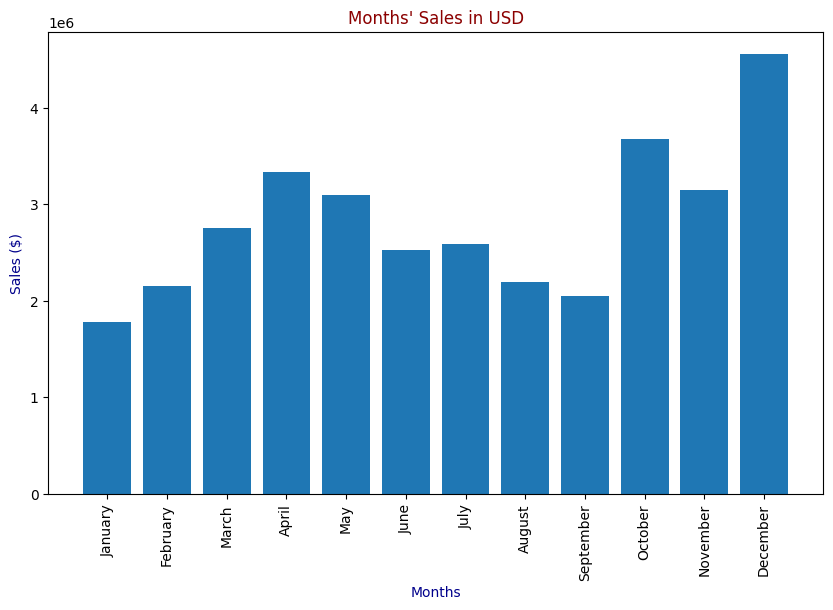

In [54]:
# using plot
plt.style.use('default')
plt.figure(figsize=(10, 6))

plt.bar(months, months_sales.total_sales)

plt.xticks(months, rotation='vertical')
plt.xlabel("Months", color='darkblue', size=10)
plt.ylabel("Sales ($)", color='darkblue', size=10)
plt.title("Months' Sales in USD", color='darkred', size=12)

plt.savefig("./img/01_months_sales")
plt.show()

**December was the best month for sales with 4.557905e+06 USD**

---
### Q2: What city sold the most product?

We can answer this question by plotting bar chart betweet cities and total sales.

In [40]:
df.groupby('city').sum().sort_values('total_sales', ascending=False)

,order_id,quantity_ordered,price_each,total_sales,hour
city,,,,,
"San Francisco, CA",10127798551,49363.0,8.074046e+06,8.124121e+06,631900
"Los Angeles, CA",6698824762,32722.0,5.323916e+06,5.354040e+06,420439
"New York City, NY",5643048641,27470.0,4.553287e+06,4.581659e+06,351569
"Boston, MA",4517043947,22123.0,3.580075e+06,3.604081e+06,282781
"Atlanta, GA",3366679952,16304.0,2.726247e+06,2.741642e+06,210462
"Dallas, TX",3360280471,16453.0,2.702619e+06,2.717794e+06,210879
"Seattle, WA",3350585611,16281.0,2.678871e+06,2.693049e+06,209705
"Portland, OR",2269245678,11110.0,1.822878e+06,1.832539e+06,142134
"Austin, TX",2238557673,10933.0,1.777232e+06,1.786746e+06,139294


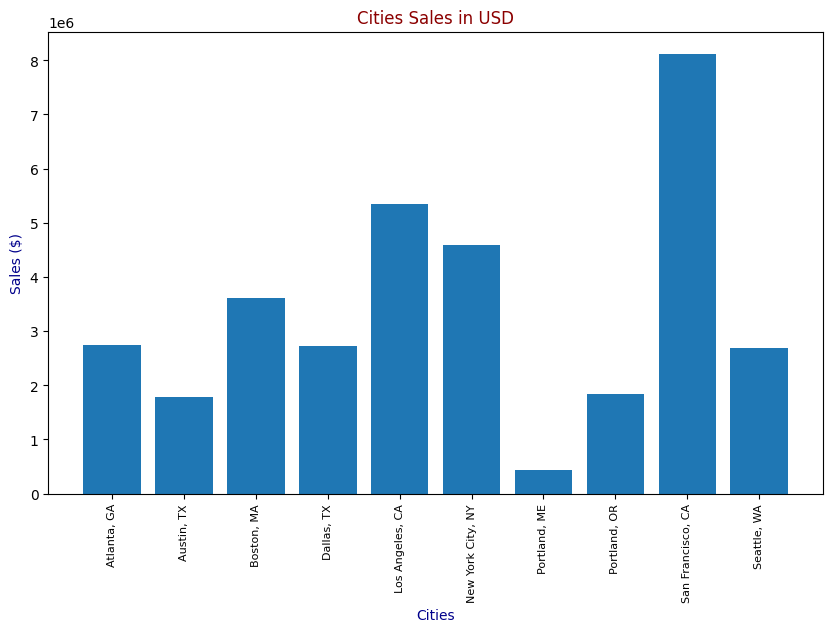

In [56]:
# using plot
city_sales = df.groupby('city').sum()
cities = [city for city, df in df.groupby('city')]

plt.figure(figsize=(10, 6))
plt.style.use('default')


plt.bar(cities, city_sales.total_sales)

plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel("Cities", color='darkblue', size=10)
plt.ylabel("Sales ($)", color='darkblue', size=10)
plt.title("Cities Sales in USD", color='darkred', size=12)

plt.savefig("./img/02_city_sales")
plt.show()

**San Francisco was the highest city in sales with 8.124121e+06 USD**

---
### Q3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

**We can answer this question by plotting line chart betweet day's hours and total sales.**

In [42]:
df.groupby('hour').sum().sort_values('total_sales', ascending=False)

,order_id,quantity_ordered,price_each,total_sales
hour,,,,
19,2928761805,14228.0,2356053.97,2370005.59
12,2854625819,13946.0,2252856.08,2269676.91
11,2813452868,13763.0,2255710.53,2267169.73
20,2775306777,13565.0,2230045.17,2242856.37
18,2780186964,13576.0,2164692.79,2176209.65
13,2748580718,13437.0,2102892.80,2118394.83
17,2473930476,12016.0,2073586.46,2086082.23
14,2495371130,12163.0,2033782.14,2045085.42
21,2475049188,12030.0,2002164.54,2013288.02


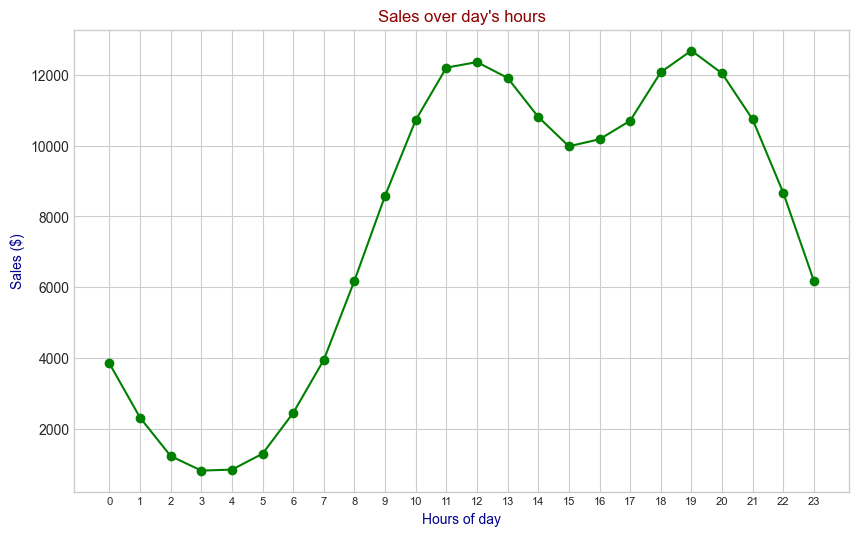

In [57]:
# using plot
hour_sales = df.groupby('hour').count()
hours = [hour for hour, df in df.groupby('hour')]

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

plt.plot(hours, hour_sales.total_sales, 'go-')

plt.xticks(hours, size=8)
plt.xlabel("Hours of day", color='darkblue', size=10)
plt.ylabel("Sales ($)", color='darkblue', size=10)
plt.title("Sales over day's hours", color='darkred', size=12)

plt.savefig("./img/03_hour_sales")
plt.show()

**Looks like we have two peaks, at 12:00 PM amd 7:00 PM, We should display more advertisement before these times.**

---
### Q4: What products are most often sold together?

**We can check `order_id`. If there are matched, that means they are the same order.**

In [44]:
# Check all duplicated order id
df_same_id = df[df.order_id.duplicated(keep=False)]
df_same_id.head(10)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14
17,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",19
18,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,"Los Angeles, CA",19
29,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11
31,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,"San Francisco, CA",17
32,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,600.00,"San Francisco, CA",17
118,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,14.95,"New York City, NY",11
119,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,11.95,"New York City, NY",11


In [45]:
# combine all products of the same order_id to one column
df_same_id['all_products'] = df_same_id.groupby('order_id')['product'].transform(lambda x: ', '.join(x))

<ipython-input-45-413fe7ea5ac8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_id['all_products'] = df_same_id.groupby('order_id')['product'].transform(lambda x: ', '.join(x))


In [46]:
df_same_id.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,hour,all_products
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",14,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA",14,"Google Phone, Wired Headphones"
17,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA",19,"Google Phone, USB-C Charging Cable"
18,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,"Los Angeles, CA",19,"Google Phone, USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA",11,"Bose SoundSport Headphones, Bose SoundSport He..."


In [47]:
# Drop duplicated order id
df_same_id.drop_duplicates('order_id', inplace=True)

<ipython-input-47-115d3a11c302>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same_id.drop_duplicates('order_id', inplace=True)


In [48]:
# use only needed columns
df_same_id = df_same_id[['order_id', 'all_products']]
df_same_id.head()

,order_id,all_products
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


**Find out which 2 product are sold together, then we may make offers on them to increase sales.**

In [49]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_same_id.all_products:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
                 
for key, value in count.most_common(5):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 973
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 348


[*Resource: Counting “unique pairs” of numbers into a python dictionary?*](https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary)

---
### Q5: What product sold the most? Why do you think it sold the most?


In [50]:
df.groupby('product').sum()['quantity_ordered'].sort_values(ascending=False)

product
AAA Batteries (4-pack)        30487.0
AA Batteries (4-pack)         27148.0
USB-C Charging Cable          23555.0
Lightning Charging Cable      22841.0
Wired Headphones              20201.0
Apple Airpods Headphones      15383.0
Bose SoundSport Headphones    13236.0
27in FHD Monitor               7429.0
iPhone                         6732.0
27in 4K Gaming Monitor         6134.0
34in Ultrawide Monitor         6076.0
Google Phone                   5440.0
Flatscreen TV                  4724.0
Macbook Pro Laptop             4645.0
20in Monitor                   4058.0
ThinkPad Laptop                4054.0
Vareebadd Phone                2023.0
LG Washing Machine              649.0
LG Dryer                        640.0
Name: quantity_ordered, dtype: float64

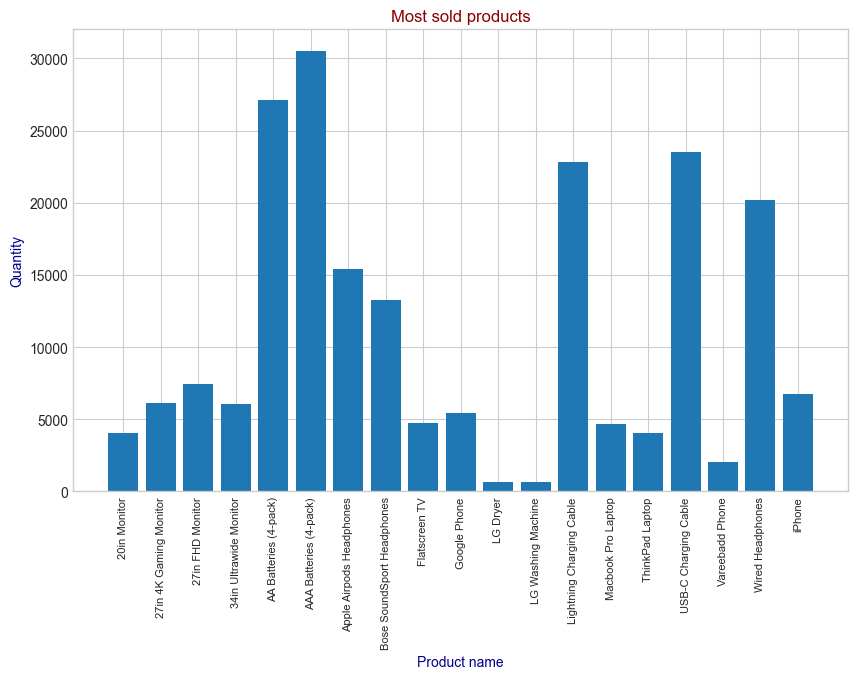

In [62]:
plt.figure(figsize=(10, 6))

product_group = df.groupby('product')
products = [product for product, df in product_group]

plt.bar(products, product_group.sum()['quantity_ordered'])

plt.xticks(products, rotation='vertical', size=8)
plt.xlabel("Product name", color='darkblue', size=10)
plt.ylabel("Quantity", color='darkblue', size=10)
plt.title("Most sold products", color='darkred', size=12)

plt.savefig("./img/04_most_product")
plt.show()

**Why AAA Batteries (4-pack) and AA Batteries (4-pack) sold more?**
- Lets compare prices to figure out why...

<ipython-input-63-e74f2ab1a6fa>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


<Figure size 1200x800 with 0 Axes>

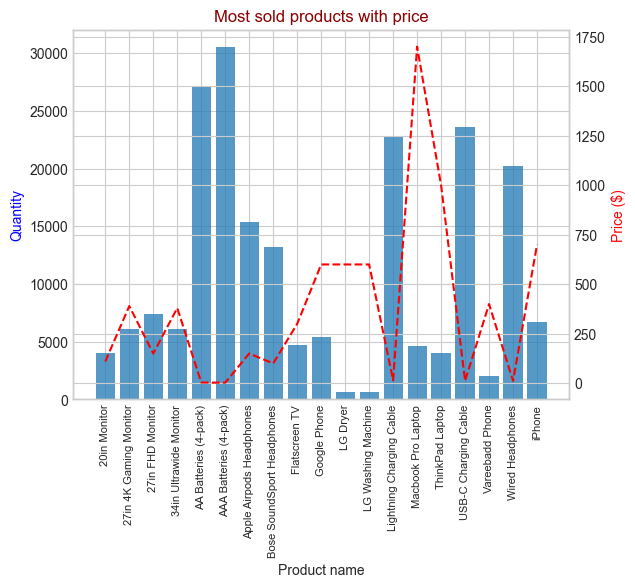

In [63]:
plt.figure(figsize=(12, 8))

prices = df.groupby('product').mean()['price_each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, product_group.sum()['quantity_ordered'], alpha=0.75)
ax2.plot(products, prices, 'r--')

ax1.set_xlabel('Product name', size=10)
ax1.set_ylabel('Quantity', color='b', size=10)
ax2.set_ylabel('Price ($)', color='r', size=10)
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.title("Most sold products with price", color='darkred', size=12)

plt.savefig("./img/05_most_product_price")

plt.show()

[*Resources: Adding a y-axis label to secondary y-axis in matplotlib*](https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib)